In [18]:
import pandas as pd
import numpy as np
%pylab inline
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [33]:
station_data = pd.read_csv('austin_bikeshare_stations.csv')
trip_data = pd.read_csv('austin_bikeshare_trips.csv')

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [3]:
# Drop na() values
trip_data1 = trip_data.dropna()
trip_data1['year'] = trip_data1['year'].apply(lambda x : str(int(x)))

C:\Users\Akhil\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
trip_data[:5]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [34]:
# Time period of the data
trip_data1['date'] = pd.to_datetime(trip_data1['start_time'])

C:\Users\Akhil\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# Unique values of the factor variables in the data
len(trip_data1['subscriber_type'].unique())

50

Text(0.5,0,'hi')

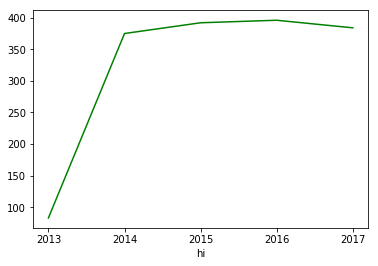

In [27]:
#Total number of bikes for all the years
len(trip_data1['bikeid'].unique())

# Trend in the number of the bikes over time
df = pd.DataFrame(trip_data1[['year','bikeid']].drop_duplicates().groupby('year')['bikeid'].count().reset_index())
plot(df['year'],df['bikeid'],color = 'green',linestyle = '-')

count    484608.000000
mean         22.830145
std          27.844553
min           0.000000
25%           8.000000
50%          14.000000
75%          25.000000
max         200.000000
Name: duration_minutes, dtype: float64

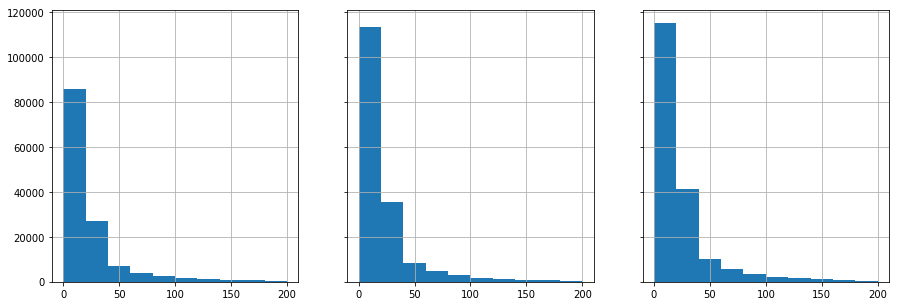

In [137]:
# Box plots for duration in each year
# boxplot(trip_data1['duration_minutes'])
fig,((ax1,ax2,ax3)) = subplots(nrows=1,
                           ncols=3,
                           sharey=True,
                           figsize=(15, 5))

# Only 2014,2015,2016 have been considered due to availability of complete data
# Same distribution is evident across years in duration minutes

trip_data1[trip_data1['year'] == '2014']['duration_minutes'].hist(ax = ax1,range=[0, 200])
trip_data1[trip_data1['year'] == '2015']['duration_minutes'].hist(ax = ax2,range=[0, 200])
trip_data1[trip_data1['year'] == '2016']['duration_minutes'].hist(ax = ax3,range=[0, 200])


# Subsetting data for only 2014,2015,2016

trip_data_year = trip_data1[trip_data1['year'].isin(['2014','2015','2016'])]

# Removing data with duration > 300 minutes for analysis purpose
trip_data_cleaned = trip_data_year[trip_data_year['duration_minutes'] <= 200]
trip_data_cleaned['duration_minutes'].describe()

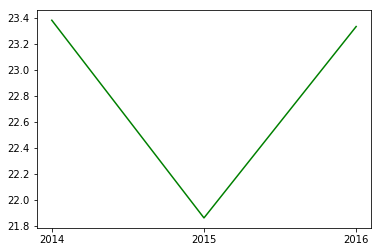

In [143]:
# Average duration over time
duration = pd.DataFrame(trip_data_cleaned.groupby('year')['duration_minutes'].mean().reset_index())
plot(duration['year'],duration['duration_minutes'],color = 'green',linestyle = '-')
# Need to add labels
# Need to check why the average duration went down during 2015
# Need to check how to include 0 in teh y-axis

In [162]:
# Average duration by subscriber types in 2017
subs_type = pd.DataFrame(trip_data_cleaned.groupby(['year','subscriber_type'])['duration_minutes'].mean().reset_index().\
                         sort_values(by = 'duration_minutes',ascending = False))

Text(0.5,1,'duration by subscriber type -2016')

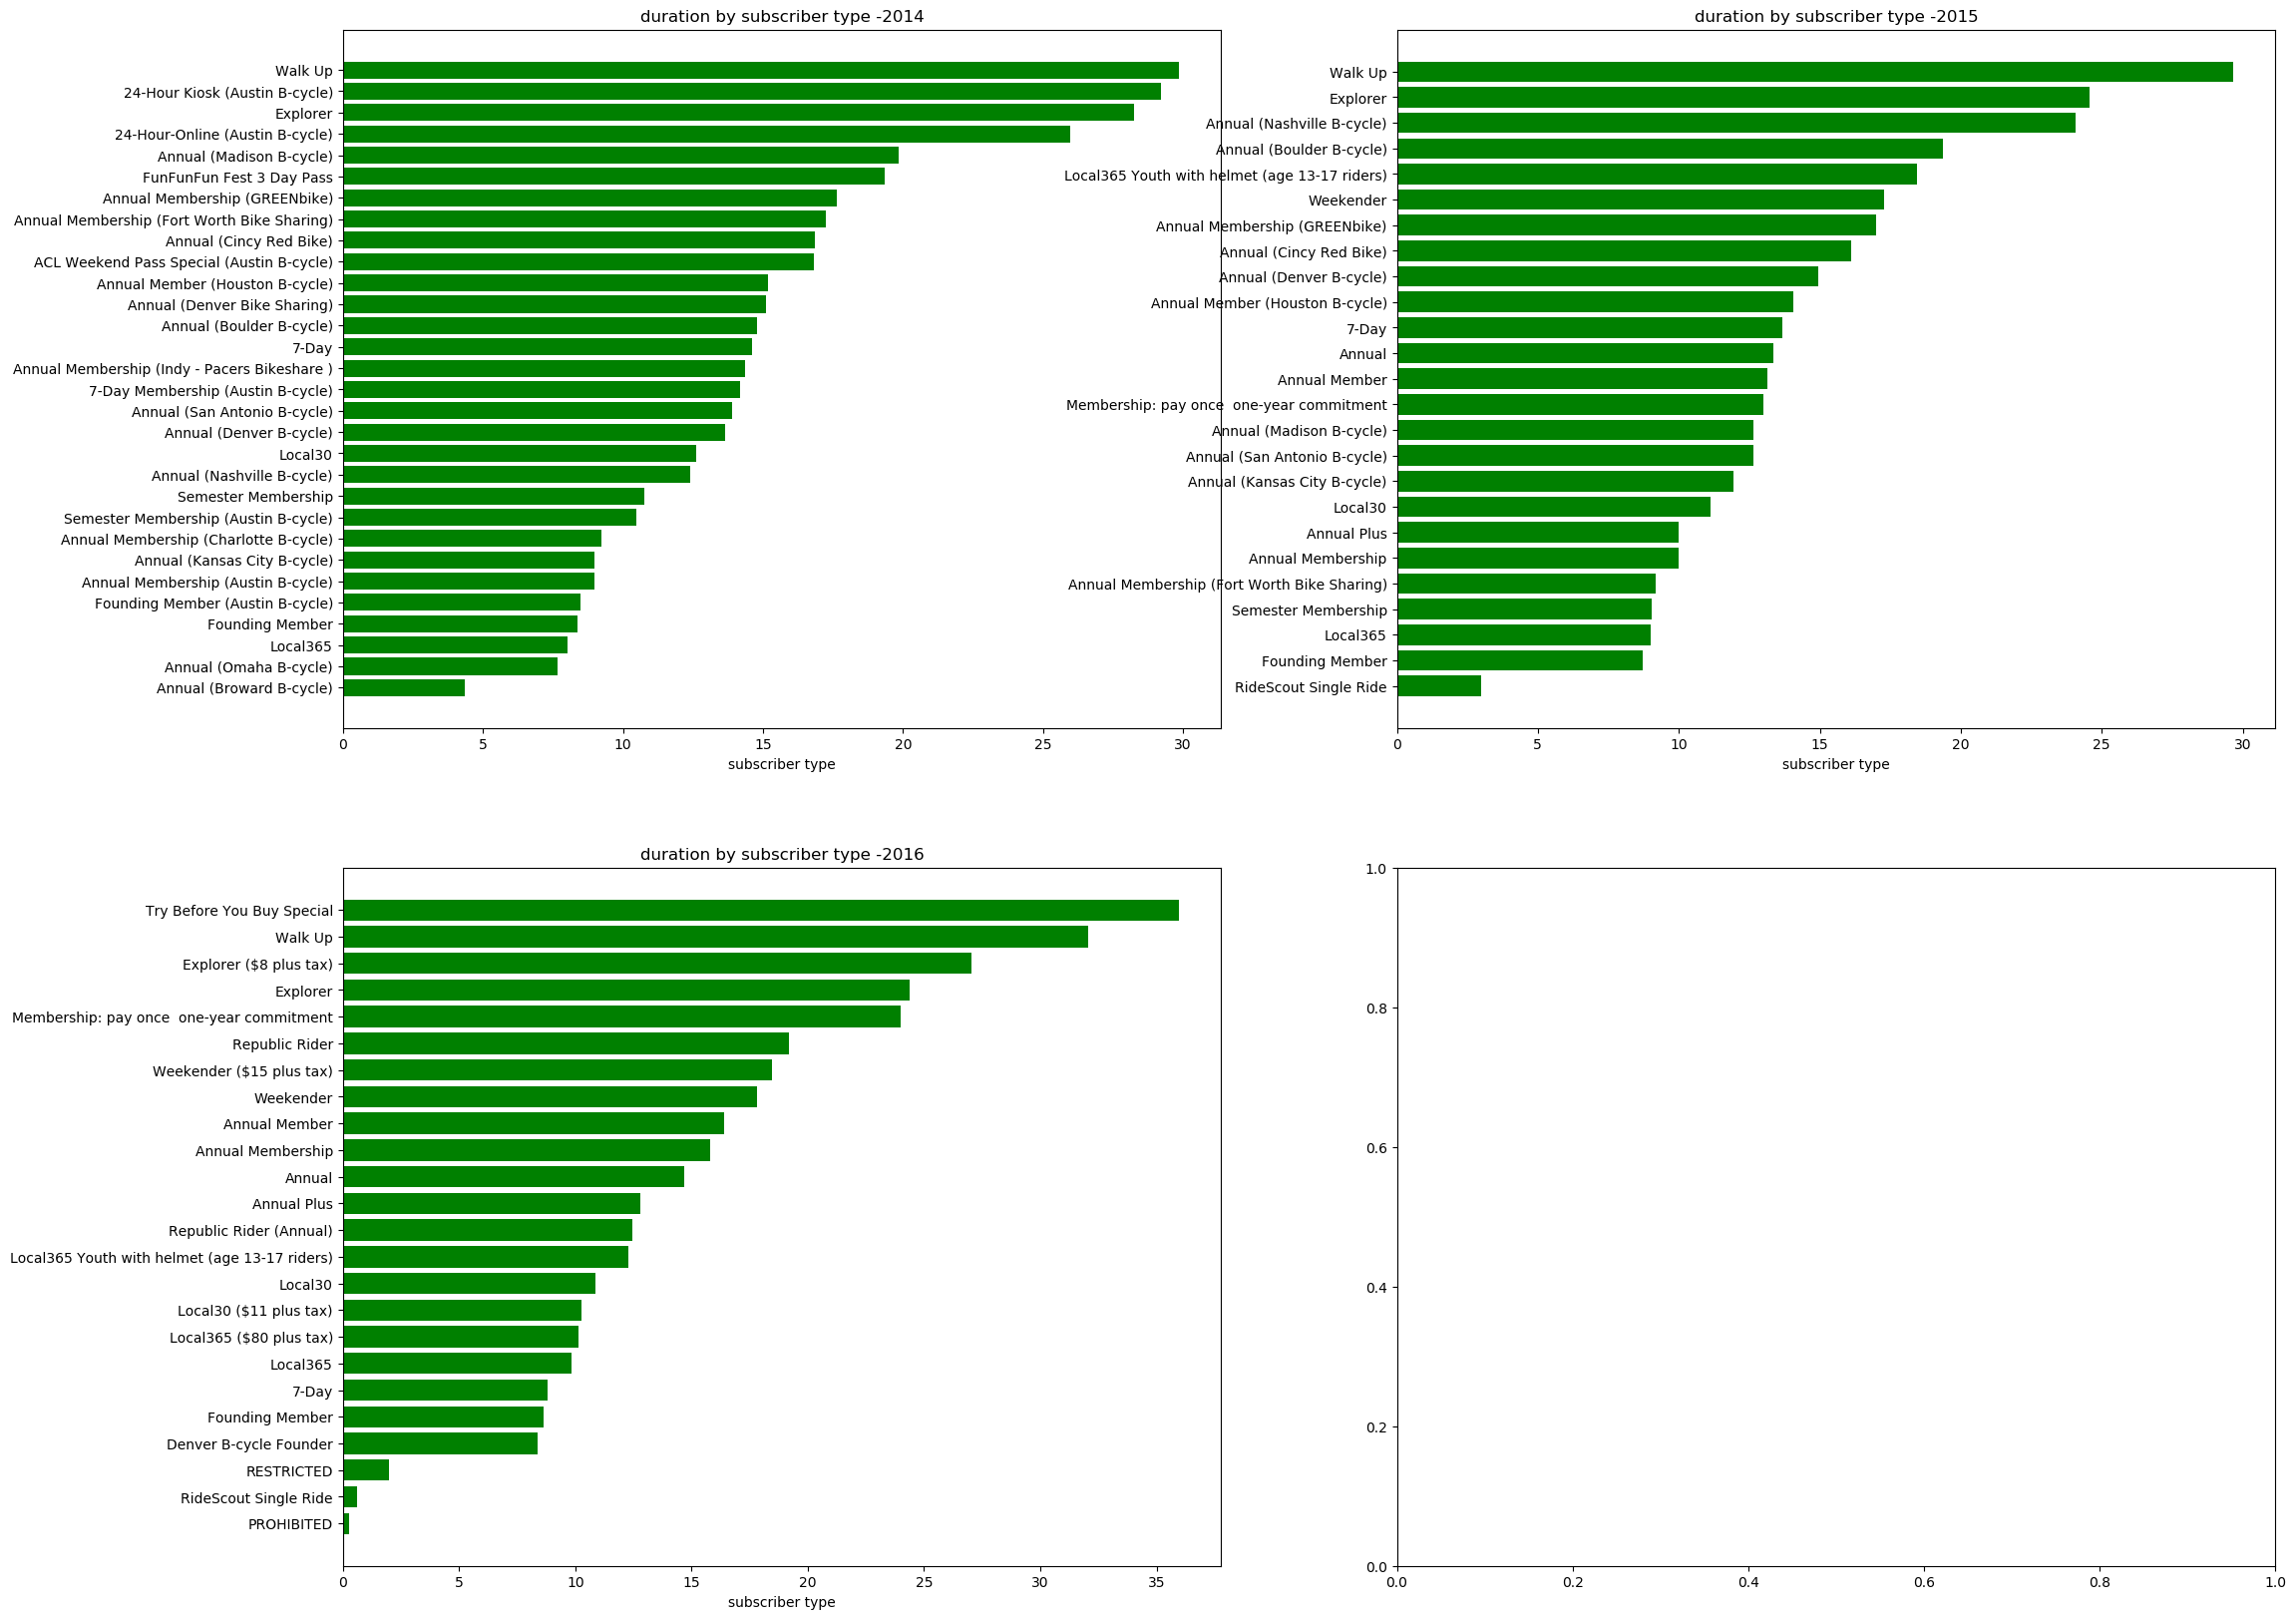

In [161]:
plt.rcdefaults()
fig,((ax1,ax2),(ax3,ax4)) = subplots(nrows=2,
                           ncols=2,
                           sharey=False,
                           figsize=(25, 20))

subs_type_2014 = subs_type[subs_type['year'] == '2014']
subs_type_2015 = subs_type[subs_type['year'] == '2015']
subs_type_2016 = subs_type[subs_type['year'] == '2016']

ax1.barh(subs_type_2014['subscriber_type'],subs_type_2014['duration_minutes'], align='center',
        color='green', ecolor='black')
ax1.set_yticks(subs_type_2014['subscriber_type'])
ax1.set_yticklabels(subs_type_2014['subscriber_type'])
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('subscriber type')
ax1.set_title('duration by subscriber type -2014')

ax2.barh(subs_type_2015['subscriber_type'],subs_type_2015['duration_minutes'], align='center',
        color='green', ecolor='black')
ax2.set_yticks(subs_type_2015['subscriber_type'])
ax2.set_yticklabels(subs_type_2015['subscriber_type'])
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('subscriber type')
ax2.set_title('duration by subscriber type -2015')

ax3.barh(subs_type_2016['subscriber_type'],subs_type_2016['duration_minutes'], align='center',
        color='green', ecolor='black')
ax3.set_yticks(subs_type_2016['subscriber_type'])
ax3.set_yticklabels(subs_type_2016['subscriber_type'])
ax3.invert_yaxis()  # labels read top-to-bottom
ax3.set_xlabel('subscriber type')
ax3.set_title('duration by subscriber type -2016')

In [186]:
#Stations with maximum number of start trips in 2017
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# Need to understand the above piece of code

data_subset_years = trip_data1[trip_data1['year'].isin(['2014','2015','2016'])]
busiest_stations = pd.DataFrame(data_subset_years.groupby(['year','start_station_id','start_station_name'])['trip_id'].count().reset_index()).\
                                                                                    sort_values(by = 'trip_id',ascending= False)

busiest_stations_2014_top10 = busiest_stations[busiest_stations['year'] == '2014'][:10]
busiest_stations_2015_top10 = busiest_stations[busiest_stations['year'] == '2015'][:10]
busiest_stations_2016_top10 = busiest_stations[busiest_stations['year'] == '2016'][:10]
display_side_by_side(busiest_stations_2014_top10,busiest_stations_2015_top10,busiest_stations_2016_top10)
# display(busiest_stations_2014_top10)
# display(busiest_stations_2015_top10)
# display(busiest_stations_2016_top10)

# Yet to observe the migration across stations
# Need to come up with an algo to identify the pattern

,year,start_station_id,start_station_name,trip_id
8,2014,2499.0,City Hall / Lavaca & 2nd,8144
7,2014,2498.0,Convention Center / 4th St. @ MetroRail,7328
10,2014,2501.0,5th & Bowie,6881
4,2014,2495.0,4th & Congress,6472
40,2014,2575.0,Riverside @ S. Lamar,5675
6,2014,2497.0,Capitol Station / Congress & 11th,5628
30,2014,2563.0,Davis at Rainey Street,5620
3,2014,2494.0,2nd & Congress,5267
11,2014,2502.0,Barton Springs & Riverside,4884
26,2014,2550.0,Republic Square @ Guadalupe & 4th St.,4872


In [148]:
# Migration patter of busy stations over a span of one year in 

In [ ]:
# Interactive plots over time during a day